In [1]:
import torch

from model_nflows import make_nflows_nice
import pytorch_lightning as pl

import matplotlib.pyplot as plt

/home/yasin/anaconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_cuda.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [3]:
state_dict = torch.load("./epoch=945-step=94600.ckpt", map_location=torch.device('cpu'))["state_dict"]

In [4]:
state_dict = {".".join(k.split(".")[1:]):state_dict[k] for k in state_dict}

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = make_nflows_nice(device=device)

In [6]:
state_dict.keys()

dict_keys(['_transform._transforms.0.scale', '_transform._transforms.0.identity_features', '_transform._transforms.0.transform_features', '_transform._transforms.0.transform_net.initial_layer.weight', '_transform._transforms.0.transform_net.initial_layer.bias', '_transform._transforms.0.transform_net.blocks.0.linear_layers.0.weight', '_transform._transforms.0.transform_net.blocks.0.linear_layers.0.bias', '_transform._transforms.0.transform_net.blocks.0.linear_layers.1.weight', '_transform._transforms.0.transform_net.blocks.0.linear_layers.1.bias', '_transform._transforms.0.transform_net.blocks.1.linear_layers.0.weight', '_transform._transforms.0.transform_net.blocks.1.linear_layers.0.bias', '_transform._transforms.0.transform_net.blocks.1.linear_layers.1.weight', '_transform._transforms.0.transform_net.blocks.1.linear_layers.1.bias', '_transform._transforms.0.transform_net.blocks.2.linear_layers.0.weight', '_transform._transforms.0.transform_net.blocks.2.linear_layers.0.bias', '_transf

In [7]:
a, b =model.load_state_dict(state_dict, strict=False)
a, b

(['_transform._transforms.0.transform_net.net.0.weight',
  '_transform._transforms.0.transform_net.net.2.0.0.weight',
  '_transform._transforms.0.transform_net.net.2.1.0.weight',
  '_transform._transforms.0.transform_net.net.2.2.0.weight',
  '_transform._transforms.0.transform_net.net.2.3.0.weight',
  '_transform._transforms.0.transform_net.net.3.weight',
  '_transform._transforms.1.transform_net.net.0.weight',
  '_transform._transforms.1.transform_net.net.2.0.0.weight',
  '_transform._transforms.1.transform_net.net.2.1.0.weight',
  '_transform._transforms.1.transform_net.net.2.2.0.weight',
  '_transform._transforms.1.transform_net.net.2.3.0.weight',
  '_transform._transforms.1.transform_net.net.3.weight',
  '_transform._transforms.2.transform_net.net.0.weight',
  '_transform._transforms.2.transform_net.net.2.0.0.weight',
  '_transform._transforms.2.transform_net.net.2.1.0.weight',
  '_transform._transforms.2.transform_net.net.2.2.0.weight',
  '_transform._transforms.2.transform_net.ne

In [8]:
samples = model.sample(20_000).reshape((20_000, 16, 8))

In [9]:
samples.shape

torch.Size([20000, 16, 8])

In [10]:
abs_mag = samples.abs().mean(dim=[1,2])

In [11]:
abs_mag = abs_mag.detach().cpu()

In [12]:
abs_mag.mean()

tensor(0.6829)

In [13]:
abs_mag.std()

tensor(0.1023)

(array([  1.,   1.,   2.,   1.,   0.,   1.,   1.,   2.,   4.,   3.,   6.,
          6.,   5.,   8.,  16.,  23.,  23.,  20.,  26.,  26.,  34.,  39.,
         54.,  54.,  63.,  94., 104.,  92., 106., 131., 168., 181., 180.,
        198., 209., 230., 294., 301., 374., 325., 412., 389., 457., 465.,
        495., 458., 510., 591., 568., 581., 655., 579., 595., 549., 602.,
        582., 593., 548., 577., 543., 487., 472., 451., 446., 408., 413.,
        377., 323., 323., 305., 250., 217., 200., 181., 144., 140., 126.,
         94.,  67.,  82.,  63.,  55.,  48.,  37.,  32.,  26.,  19.,   7.,
         14.,  11.,   4.,   3.,   3.,   4.,   2.,   5.,   3.,   1.,   0.,
          2.]),
 array([1.68264818, 1.69034791, 1.69804752, 1.70574725, 1.71344697,
        1.72114658, 1.72884631, 1.73654604, 1.74424565, 1.75194538,
        1.7596451 , 1.76734471, 1.77504444, 1.78274417, 1.79044378,
        1.79814351, 1.80584323, 1.81354284, 1.82124257, 1.8289423 ,
        1.83664191, 1.84434164, 1.85204136, 1.

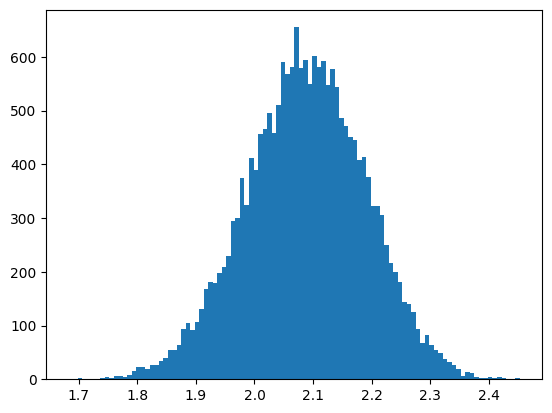

In [14]:
n_points = len(abs_mag)
n_bins = 100

plt.hist(abs_mag, bins=n_bins)